In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
d12_default_SU = {'18x16': 211.52}
d12_default_wall = {'18x16' : '0:22:02'}

d5_default_SU = {'36x32': 3203.2}
d5_default_wall = {'36x32' : '1:23:24'}

d1_default_SU = {'54x48': 12461.76}
d1_default_wall = {'54x48' : '2:24:14'}

In [3]:
d12_OMP2_SU = {'18x16': 238.08, '32x30' : 455.47}
d12_OMP2_wall = {'18x16' : '0:12:24', '32x30' : '0:07:07'}

d5_OMP2_SU = {'36x32': 3735.04, '54x48' : 6209.29}
d5_OMP2_wall = {'36x32' : '0:48:38', '54x48' : '0:35:56'}

d1_OMP2_SU = {'54x48': 15344.64}
d1_OMP2_wall = {'54x48' : '1:28:48'}

In [4]:
d12_IO_SU = {'30x26': 434.14}
d12_IO_wall = {'30x26' : '0:06:47'}

d5_IO_SU = {'54x48' : 4511.47}
d5_IO_wall = {'54x48' : '0:25:38'}

d1_IO_SU = {'54x48': 12842.13}
d1_IO_wall = {'54x48' : '1:12:58'}

In [5]:
d5_MPI_IO_SU = {'18x16': 3289.44, '36x32' : 3273.34, '54x48' : 4197.59}
d5_MPI_IO_wall = {'18x16' : '2:26:00', '36x32' : '0:40:55', '54x48' : '0:23:51'}

d1_MPI_IO_SU = {'36x32' : 12829.39, '54x48': 11014.66, '72x70' : 16326.82}
d1_MPI_IO_wall = {'36x32' : '1:26:20', '54x48' : '1:02:35', '72x70' : '0:48:08'}

In [6]:
d5_sapphire_SU = {'36x32' : 3416.11, '54x48' : 4210.56 }
d5_sapphire_wall = {'36x32' : '0:39:25', '54x48' : '0:22:05'}

d1_sapphire_SU = {'54x48': 10931.55, '68x68' : 17422.66}
d1_sapphire_wall = {'54x48' : '0:57:20', '68x68' : '0:51:17'}

In [7]:
d5_qopt_SU = {'18x16' : 2964.56, '36x32' : 3190.78 }
d5_qopt_wall = {'18x16' :'2:03:08', '36x32' : '0:36:49'}

d1_qopt_SU = {'36x32' : 9316.67, '54x48': 10585.18, '68x68' : 13408.14}
d1_qopt_wall = {'36x32' : '1:47:30','54x48' : '0:55:31', '68x68' : '0:39:28'}

In [8]:
d12_stripe_SU = {'18x16' : 231.75 }
d12_stripe_wall = {'18x16' : '0:09:33'}

d5_stripe_SU = {'18x16' : 3073.37, '36x32' : 3251.45, '54x48' : 4169.24 }
d5_stripe_wall = {'18x16' :'2:06:39', '36x32' : '0:37:31', '54x48' : '0:21:52' }

d1_stripe_SU = {'36x32' : 9501.55,'54x48': 10547.04, '68x68' : 11518.75}
d1_stripe_wall = {'36x32' : '1:49:38', '54x48' : '0:55:19','68x68' : '0:34:34' }

In [9]:
d12_SU = pd.DataFrame([d12_default_SU,d12_OMP2_SU,d12_IO_SU,d12_stripe_SU],
                      index=['default','OMP2','I/O Server','Striping'])
d12_wall = pd.DataFrame([d12_default_wall,d12_OMP2_wall,d12_IO_wall,d12_stripe_wall],
                        index=['default','OMP2','I/O Server','Striping'])

In [10]:
d12_SU

,18x16,32x30,30x26
default,211.52,NaN,NaN
OMP2,238.08,455.47,NaN
I/O Server,NaN,NaN,434.14
Striping,231.75,NaN,NaN


<Axes: >

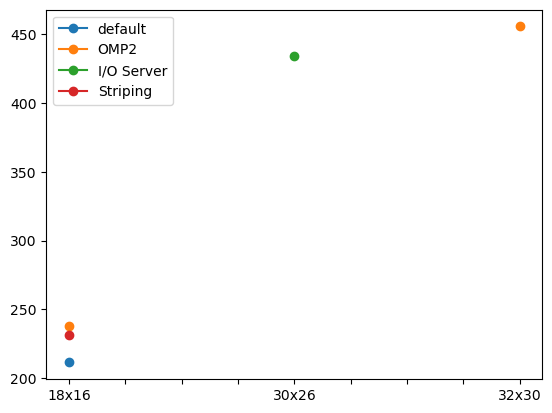

In [11]:
d12_SU.iloc[:,[0,2,1]].T.plot(marker='o')

In [12]:
d12_wall

,18x16,32x30,30x26
default,0:22:02,NaN,NaN
OMP2,0:12:24,0:07:07,NaN
I/O Server,NaN,NaN,0:06:47
Striping,0:09:33,NaN,NaN


In [13]:
def convert_wall(df):
    all = []
    for col,series in df.items():
        t_series=pd.to_timedelta(series).dt.total_seconds()
        print (t_series.dtype)
        all.append(t_series)
    
    df_out=pd.concat(all,axis=1)/60.

    return df_out

In [14]:
d12_time = convert_wall(d12_wall)

float64
float64
float64


<Axes: >

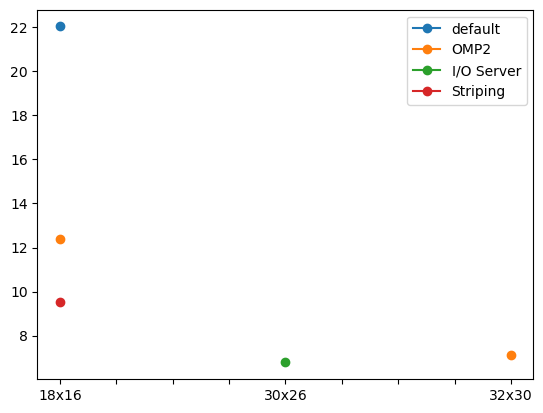

In [15]:
(d12_time).iloc[:,[0,2,1]].T.plot(marker='o')

In [16]:
d5_SU = pd.DataFrame([d5_default_SU,d5_OMP2_SU,d5_IO_SU,d5_MPI_IO_SU,d5_sapphire_SU,d5_qopt_SU,d5_stripe_SU],
                     index=['default','OMP2','I/O Server', 'MPI-IO','Sapphire','Sapphire w/qopt','Striping'])
d5_wall = pd.DataFrame([d5_default_wall,d5_OMP2_wall,d5_IO_wall,d5_MPI_IO_wall,d5_sapphire_wall,d5_qopt_wall,d5_stripe_wall],
                       index=['default','OMP2','I/O Server','MPI-IO','Sapphire','Sapphire w/qopt','Striping'])

In [17]:
d5_SU

,36x32,54x48,18x16
default,3203.20,NaN,NaN
OMP2,3735.04,6209.29,NaN
I/O Server,NaN,4511.47,NaN
MPI-IO,3273.34,4197.59,3289.44
Sapphire,3416.11,4210.56,NaN
Sapphire w/qopt,3190.78,NaN,2964.56
Striping,3251.45,4169.24,3073.37


<Axes: >

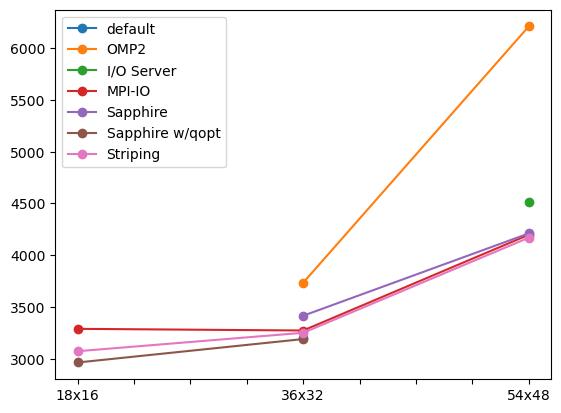

In [18]:
d5_SU.iloc[:,[2,0,1]].T.plot(marker='o')

In [19]:
d5_time = convert_wall(d5_wall)

float64
float64
float64


In [20]:
d5_time

,36x32,54x48,18x16
default,83.400000,NaN,NaN
OMP2,48.633333,35.933333,NaN
I/O Server,NaN,25.633333,NaN
MPI-IO,40.916667,23.850000,146.000000
Sapphire,39.416667,22.083333,NaN
Sapphire w/qopt,36.816667,NaN,123.133333
Striping,37.516667,21.866667,126.650000


<Axes: >

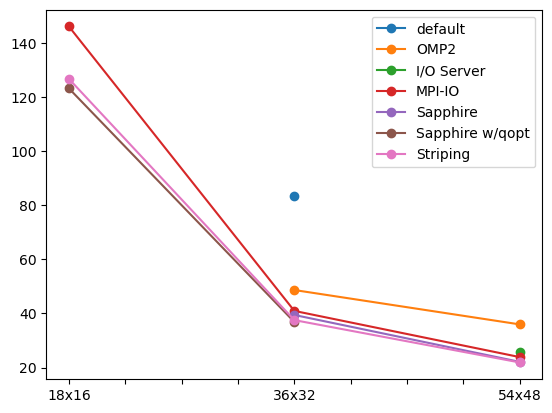

In [21]:
d5_time.iloc[:,[2,0,1]].T.plot(marker='o')

In [22]:
d1_SU = pd.DataFrame([d1_default_SU,d1_OMP2_SU,d1_IO_SU,d1_MPI_IO_SU,d1_sapphire_SU,d1_qopt_SU,d1_stripe_SU],
                     index=['default','OMP2','I/O Server', 'MPI-IO','Sapphire','Sapphire w/qopt','Striping'])
d1_wall = pd.DataFrame([d1_default_wall,d1_OMP2_wall,d1_IO_wall,d1_MPI_IO_wall,d1_sapphire_wall,d1_qopt_wall,d1_stripe_wall],
                       index=['default','OMP2','I/O Server','MPI-IO','Sapphire','Sapphire w/qopt','Striping'])

In [23]:
d1_SU

,54x48,36x32,72x70,68x68
default,12461.76,NaN,NaN,NaN
OMP2,15344.64,NaN,NaN,NaN
I/O Server,12842.13,NaN,NaN,NaN
MPI-IO,11014.66,12829.39,16326.82,NaN
Sapphire,10931.55,NaN,NaN,17422.66
Sapphire w/qopt,10585.18,9316.67,NaN,13408.14
Striping,10547.04,9501.55,NaN,11518.75


<Axes: >

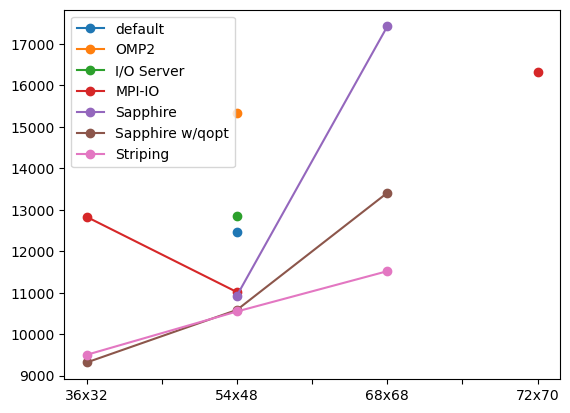

In [24]:
d1_SU.iloc[:,[1,0,3,2]].T.plot(marker='o')

In [25]:
d1_time=convert_wall(d1_wall)

float64
float64
float64
float64


In [26]:
d1_time

,54x48,36x32,72x70,68x68
default,144.233333,NaN,NaN,NaN
OMP2,88.800000,NaN,NaN,NaN
I/O Server,72.966667,NaN,NaN,NaN
MPI-IO,62.583333,86.333333,48.133333,NaN
Sapphire,57.333333,NaN,NaN,51.283333
Sapphire w/qopt,55.516667,107.500000,NaN,39.466667
Striping,55.316667,109.633333,NaN,34.566667


<Axes: title={'center': '1km Domain'}, xlabel='Decomposition', ylabel='time (minutes)'>

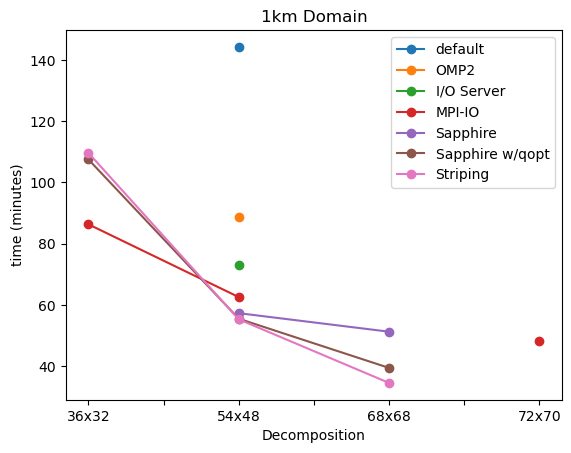

In [27]:
d1_time.iloc[:,[1,0,3,2]].T.plot(marker='o',ylabel='time (minutes)',xlabel='Decomposition',title='1km Domain')

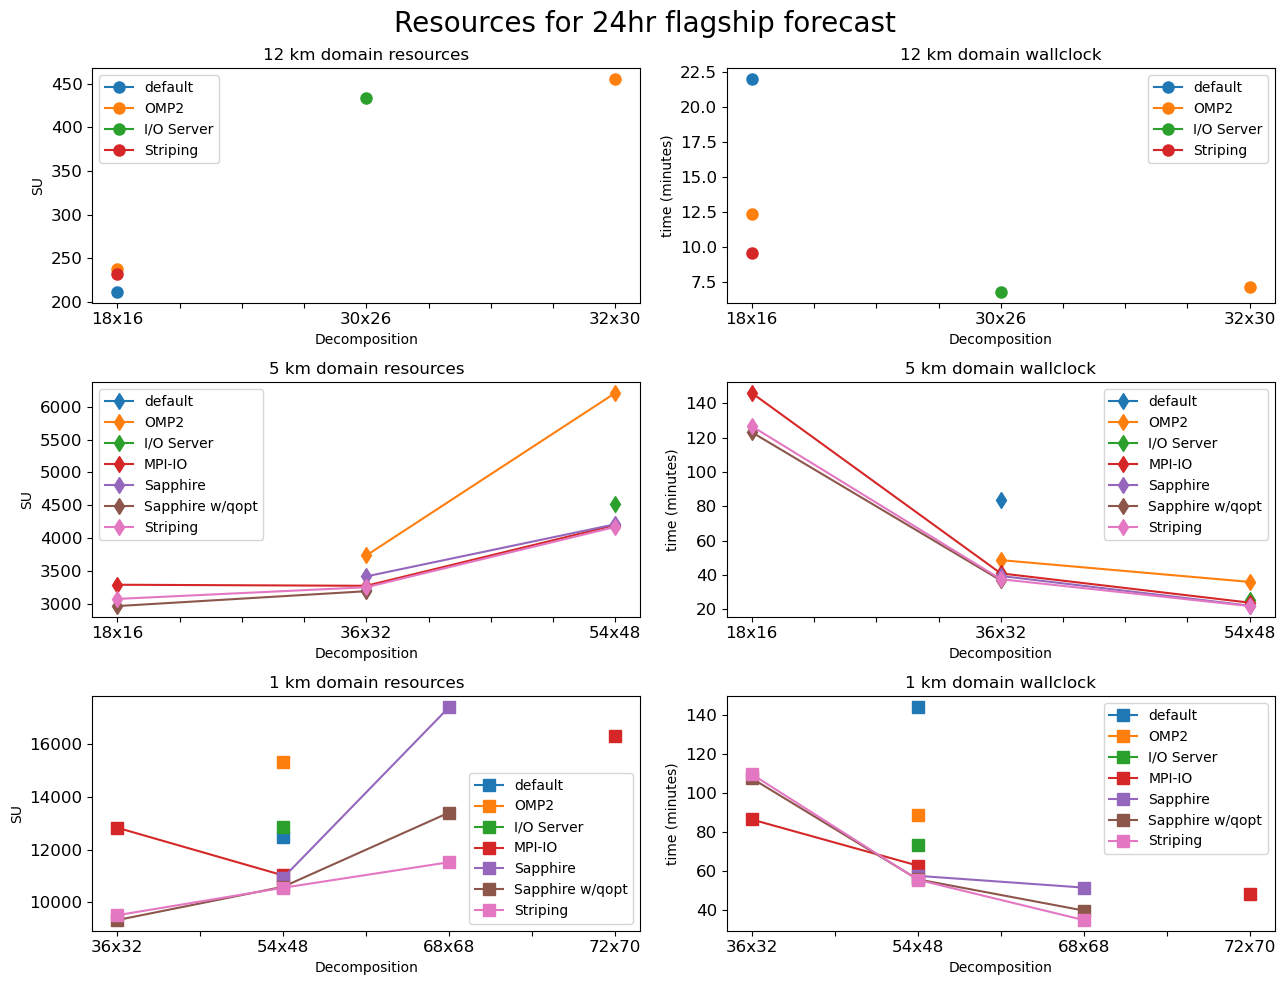

In [28]:
fig,ax=plt.subplots(3,2,figsize=(13,10))
d12_SU.iloc[:,[0,2,1]].T.plot(marker='o', markersize=8,ax=ax[0,0],ylabel='SU',xlabel='Decomposition',title='12 km domain resources',fontsize=12)
d12_time.iloc[:,[0,2,1]].T.plot(marker='o',markersize=8, ax=ax[0,1],ylabel='time (minutes)',xlabel='Decomposition',title='12 km domain wallclock',fontsize=12)

d5_SU.iloc[:,[2,0,1]].T.plot(marker='d', linestyle='solid',markersize=8,ax=ax[1,0],ylabel='SU',xlabel='Decomposition',title='5 km domain resources',fontsize=12)
d5_time.iloc[:,[2,0,1]].T.plot(marker='d',linestyle='solid',markersize=8, ax=ax[1,1],ylabel='time (minutes)',xlabel='Decomposition',title='5 km domain wallclock',fontsize=12)

d1_SU.iloc[:,[1,0,3,2]].T.plot(marker='s', linestyle='solid',markersize=8,ax=ax[2,0],ylabel='SU',xlabel='Decomposition',title='1 km domain resources',fontsize=12)
d1_time.iloc[:,[1,0,3,2]].T.plot(marker='s',linestyle='solid',markersize=8, ax=ax[2,1],ylabel='time (minutes)',xlabel='Decomposition',title='1 km domain wallclock',fontsize=12)

fig.suptitle('Resources for 24hr flagship forecast',fontsize=20)
plt.tight_layout()
plt.savefig('SU.png')

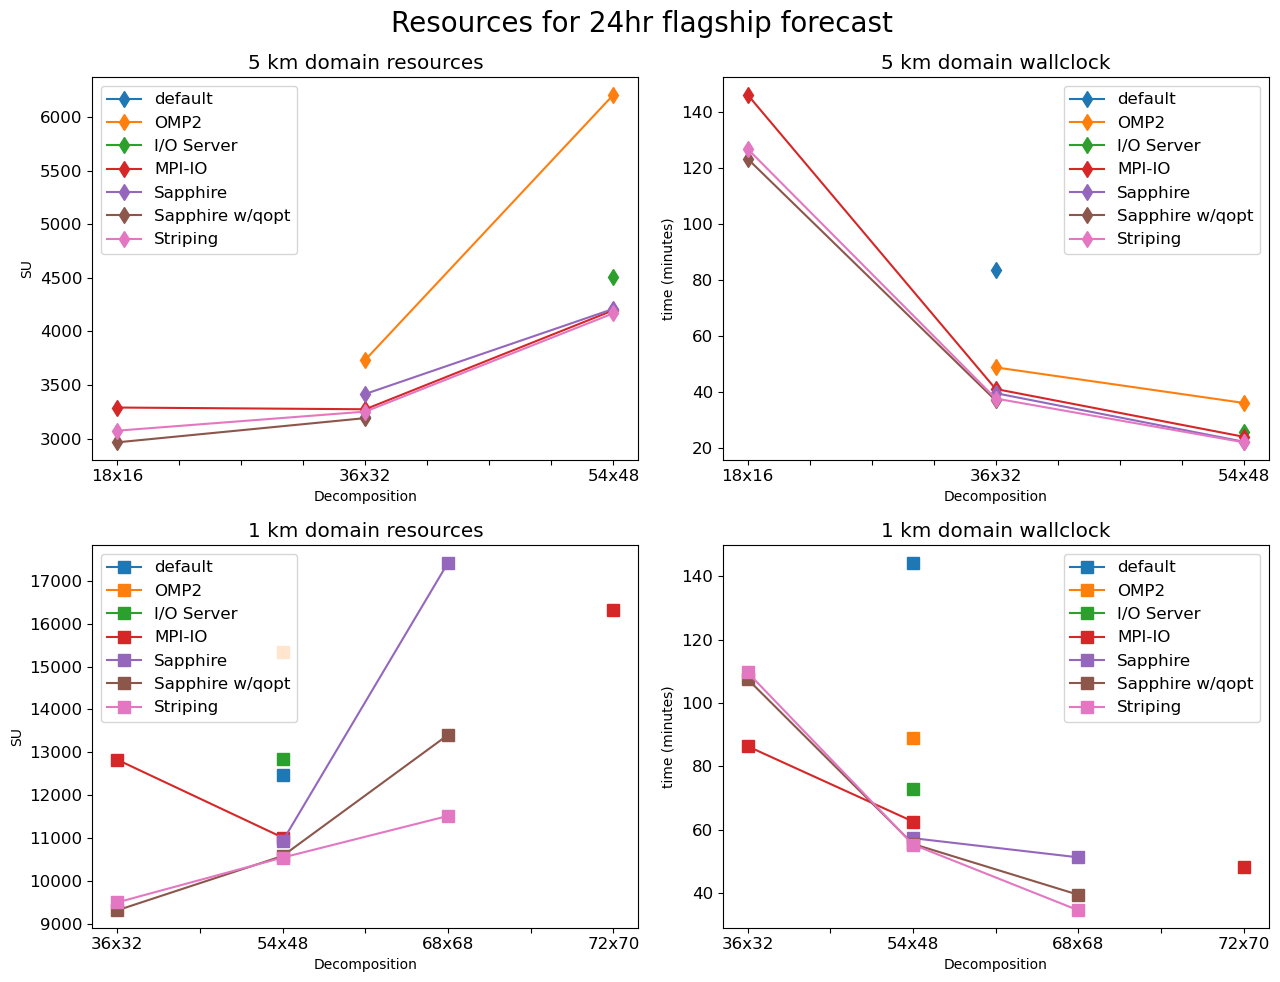

In [29]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
plt.rcParams['font.size'] = 12 
d5_SU.iloc[:,[2,0,1]].T.plot(marker='d', linestyle='solid',markersize=8,ax=ax[0,0],ylabel='SU',xlabel='Decomposition',title='5 km domain resources',fontsize=12)
d5_time.iloc[:,[2,0,1]].T.plot(marker='d',linestyle='solid',markersize=8, ax=ax[0,1],ylabel='time (minutes)',xlabel='Decomposition',title='5 km domain wallclock',fontsize=12)

d1_SU.iloc[:,[1,0,3,2]].T.plot(marker='s', linestyle='solid',markersize=8,ax=ax[1,0],ylabel='SU',xlabel='Decomposition',title='1 km domain resources',fontsize=12)
d1_time.iloc[:,[1,0,3,2]].T.plot(marker='s',linestyle='solid',markersize=8, ax=ax[1,1],ylabel='time (minutes)',xlabel='Decomposition',title='1 km domain wallclock',fontsize=12)

fig.suptitle('Resources for 24hr flagship forecast',fontsize=20)
plt.tight_layout()
plt.savefig('SU.png')